In [55]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [56]:
pd.set_option('Display.max_columns', None)
df = pd.read_csv('https://gist.githubusercontent.com/abhi18av/cdf70d2b2d9a709fc2900698c06e7664/raw/f6f2647672a516c776b2fc232417c2a41aa2453a/CarPrice_Assignment.csv')

In [57]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [58]:
df.size, df.shape

(5330, (205, 26))

In [59]:
df.isnull().sum() ## No null/nan values in our dataset

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

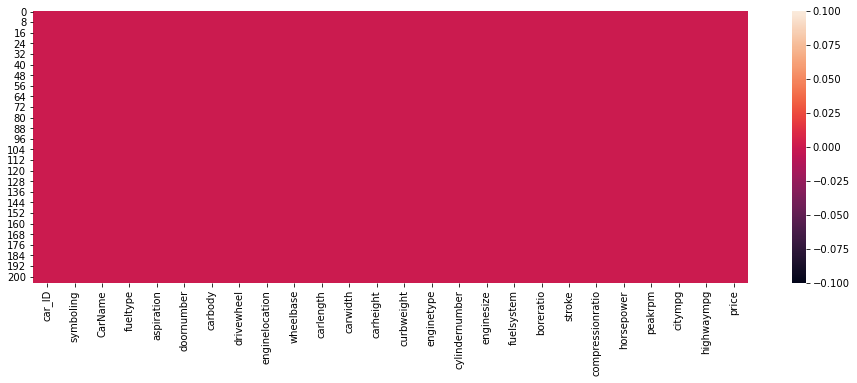

In [60]:
plt.figure(figsize=(16,5))
sns.heatmap(df.isnull())

In [61]:
Company = df['CarName'].apply(lambda x:x.split(' ')[0])
df.insert(3,'Company',Company)
df.drop(['CarName'], axis = 1, inplace = True)
df.head()

,car_ID,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [62]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [63]:
df['Company'] = df['Company'].replace({'maxda':'mazda','nissan':'Nissan','porcshce':'porsche','toyouta':'toyota'})
df['Company'] = df['Company'].replace({'vokswagen':'volkswagen'})
df['Company'] = df['Company'].replace({'vw':'volkswagen'})

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [65]:
fig = make_subplots(rows=2, cols=1)

t1 = go.Box(x=df['price'], name = 'price of company', boxmean=True)
t2 = go.Histogram(x=df['price'], )

fig.add_trace(t1, row = 1, col = 1)
fig.add_trace(t2, row=2, col=1)

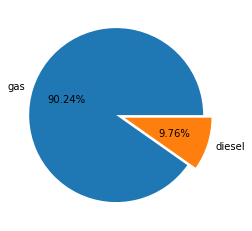

In [66]:
labels = df['fueltype'].value_counts().index
labels
plt.pie(df['fueltype'].value_counts(), labels=labels, autopct='%1.2f%%', explode = (0,0.1))
plt.show()

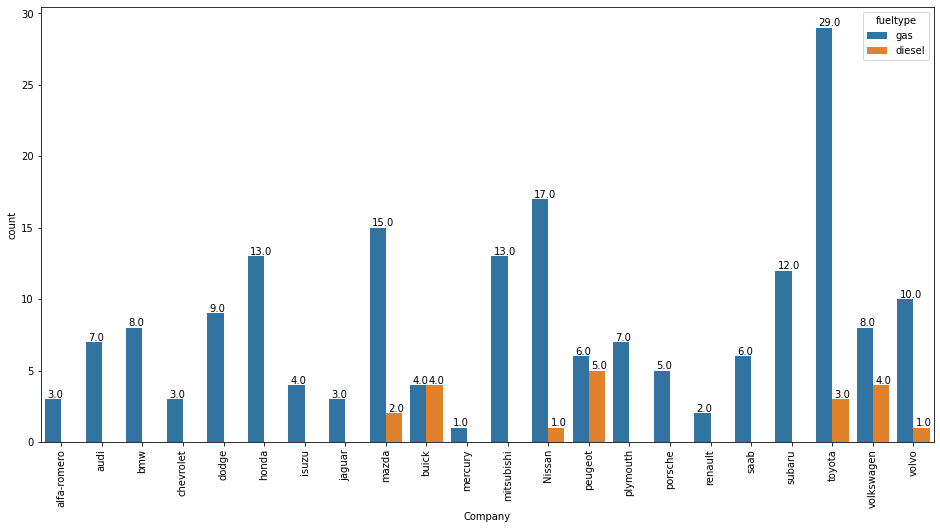

In [67]:
plt.figure(figsize=(16,8))
plot = sns.countplot(df['Company'], hue=df['fueltype'])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/7,p.get_height()+0.1))
plt.xticks(rotation = 90)
plt.show()

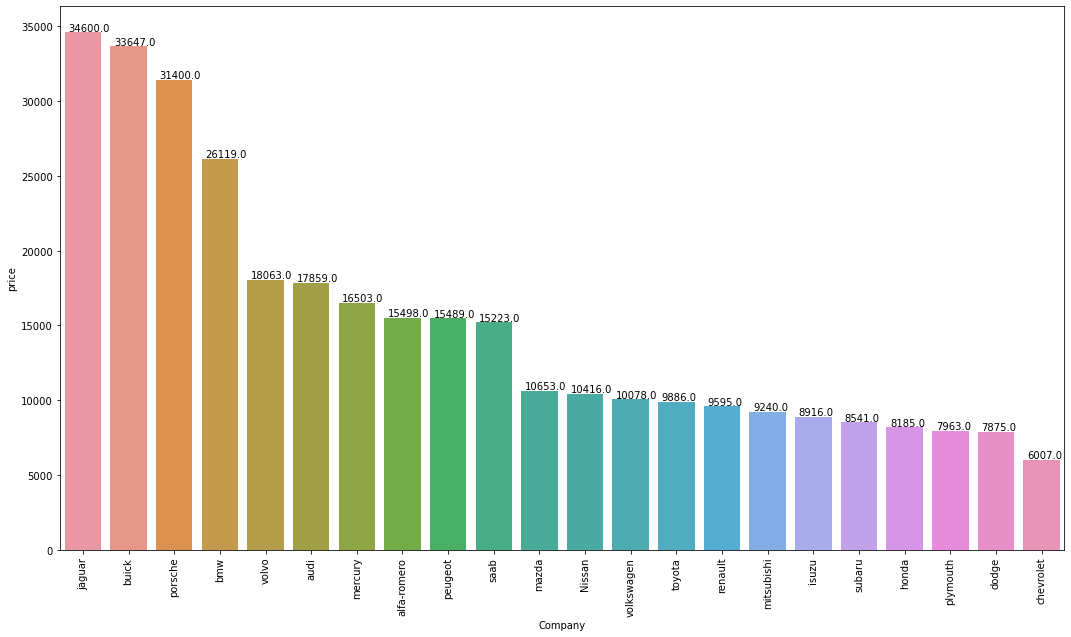

In [68]:
company_price = pd.DataFrame(round(df.groupby(['Company']).mean()['price'].sort_values(ascending = False)).reset_index())
company_price
plt.figure(figsize=(18,10))
plot = sns.barplot(data=company_price, x=company_price['Company'], y = company_price['price'])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/10, p.get_height()+100))
plt.xticks(rotation = 90)
plt.show()

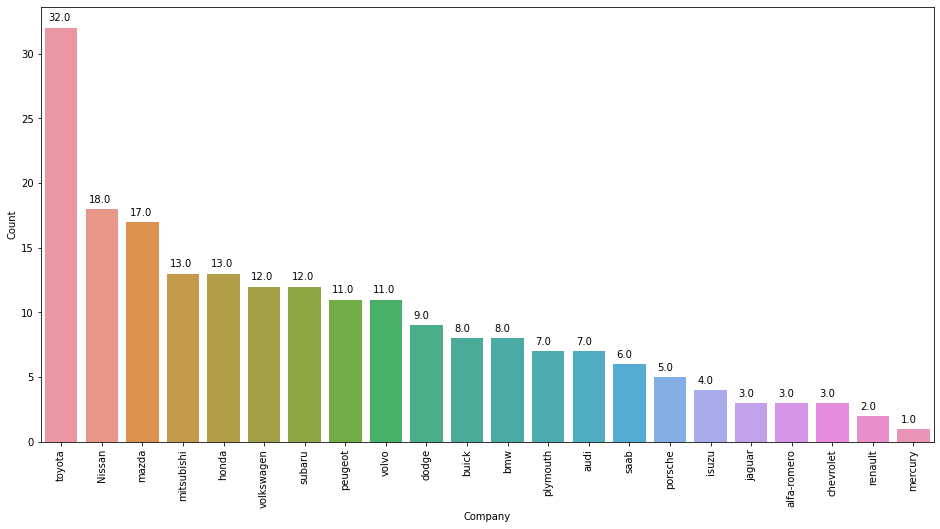

In [69]:
plt.figure(figsize=(16,8))
df_car = pd.DataFrame(df.groupby(df['Company']).count()['car_ID'].reset_index().rename(columns = 
                                                                          {'car_ID':'Count'}).sort_values(by=
                                                                                                          'Count', ascending = False))
plot = sns.barplot(data=df_car,x = df_car['Company'], y = df_car['Count'])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/10,p.get_height()+0.5))
plt.xticks(rotation = 90)
plt.show()

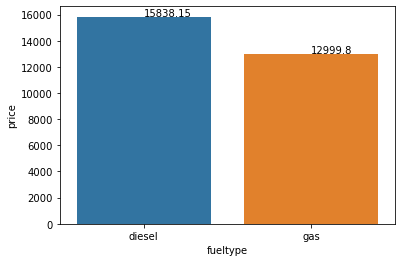

In [70]:
fuel_price= pd.DataFrame(round(df.groupby(df['fueltype']).mean()['price'],2).reset_index())
plot = sns.barplot(data=fuel_price,x=fuel_price['fueltype'],y = fuel_price['price'])
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()+20))

In [71]:
fig = make_subplots(rows = 2, cols=1)
t1 = go.Box(x=df['symboling'], y=df['price'],name = 'symboling vs price', boxmean=True)
t2 = go.Histogram(x = df['symboling'], y = df['price'])

fig.add_trace(t1,row = 1, col = 1)
fig.add_trace(t2,row = 2, col = 1)

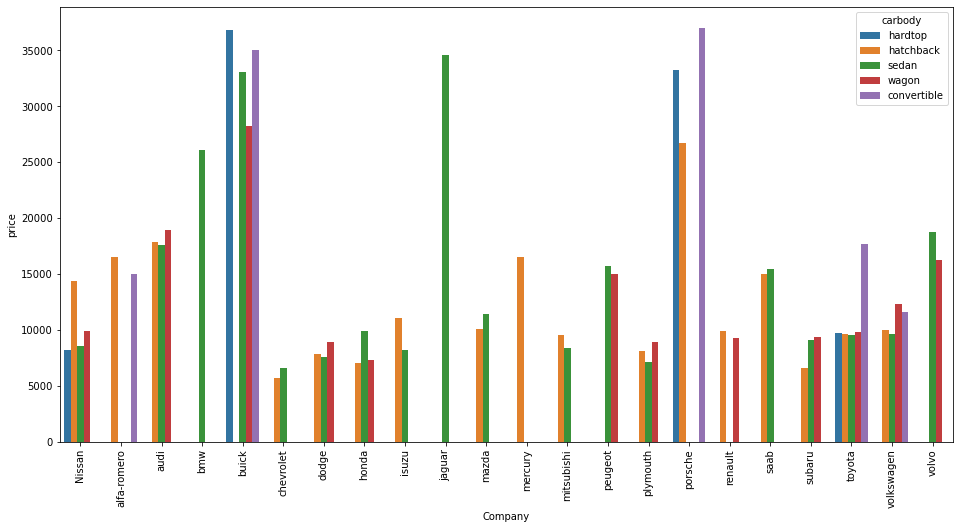

In [72]:
car_type_price = pd.DataFrame(df.groupby(['Company','carbody']).mean()['price'].reset_index())
plt.figure(figsize=(16,8))
sns.barplot(data=car_type_price, x = car_type_price['Company'],y=car_type_price['price'], hue=car_type_price['carbody'])
plt.xticks(rotation = 90)
plt.show()

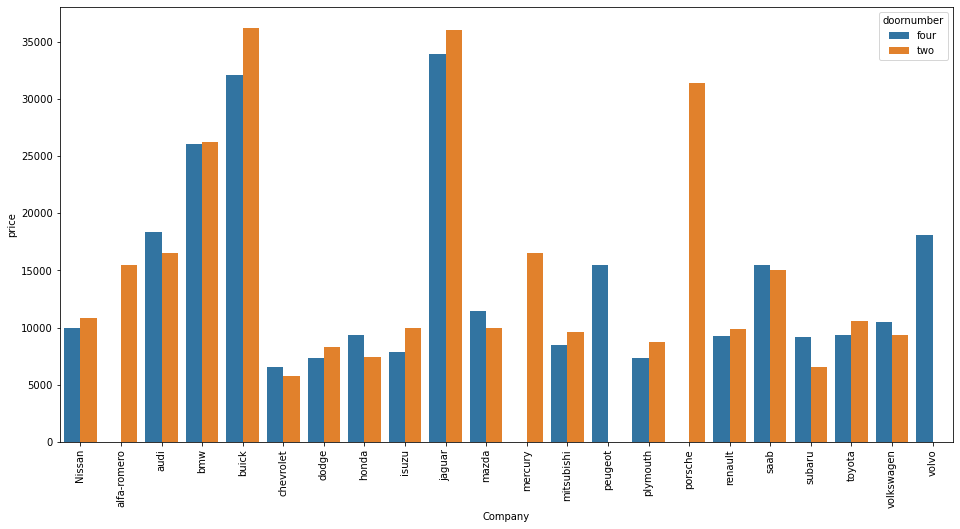

In [73]:
car_no_doors = pd.DataFrame(round(df.groupby(['Company','doornumber']).mean()['price'].reset_index()))
car_no_doors
plt.figure(figsize=(16,8))
sns.barplot(data=car_no_doors, x = car_no_doors['Company'], y=car_no_doors['price'], hue=car_no_doors['doornumber'])
plt.xticks(rotation = 90)
plt.show()

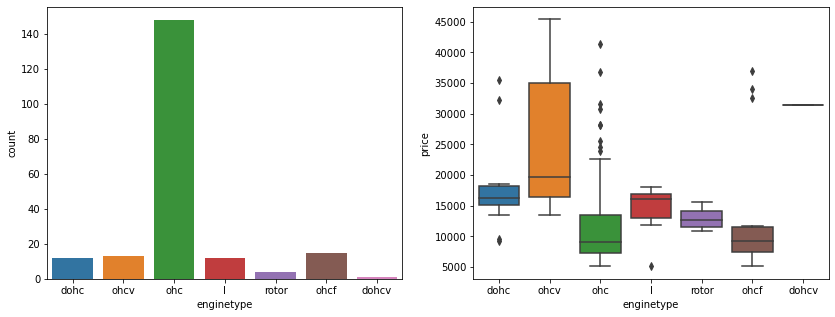

In [74]:
fig,ax = plt.subplots(1,2,figsize = (14,5))
sns.countplot(df['enginetype'],ax = ax[0])
sns.boxplot(df['enginetype'],df['price'],ax = ax[1])
plt.show()

In [75]:
df['Average_Milage'] = (df['citympg']+df['highwaympg'])/2

In [76]:
df_engine = round(df.groupby(['enginetype']).mean()[['Average_Milage','price','wheelbase']].reset_index(),2)
df_engine

,enginetype,Average_Milage,price,wheelbase
0,dohc,22.42,18116.42,100.43
1,dohcv,22.50,31400.50,98.40
2,l,26.67,14627.58,108.38
3,ohc,29.69,11574.05,98.00
4,ohcf,27.03,13738.60,94.84
5,ohcv,19.00,25098.38,102.59
6,rotor,19.88,13020.00,95.30


In [77]:
fig = make_subplots(rows = 5, cols=2)
t1 = go.Scatter(x = df['carlength'],y = df['price'],mode='markers', name='carlength')
t2 = go.Scatter(x = df['curbweight'],y = df['price'],mode = 'markers',name = 'curbweight')
t3 = go.Scatter(x = df['carheight'], y = df['price'],mode = 'markers',name='carheight')
t4 = go.Scatter(x = df['carwidth'],y = df['price'],mode = 'markers',name='carwidth')
t5 = go.Scatter(x = df['compressionratio'],y = df['price'],mode = 'markers',name='Compressionratio')
t6 = go.Scatter(x = df['peakrpm'],y = df['price'],mode = 'markers',name='peakrpm')
t7 = go.Scatter(x = df['stroke'],y = df['price'],mode = 'markers',name='stroke')
t8 = go.Scatter(x = df['fuelsystem'],y = df['price'],mode = 'markers',name='fuelsystem')
t9 = go.Scatter(x = df['doornumber'],y = df['price'],mode = 'markers',name='doornumber')


fig.add_trace(t1, row = 1, col = 1)
fig.add_trace(t2, row = 1, col = 2)
fig.add_trace(t3, row = 2, col = 1)
fig.add_trace(t4, row = 2, col = 2)
fig.add_trace(t5, row = 3, col = 1)
fig.add_trace(t6, row = 3, col = 2)
fig.add_trace(t7, row = 4, col = 1)
fig.add_trace(t8, row = 4, col = 2)
fig.add_trace(t9, row = 5, col = 1)

In [78]:
labels = ['low','medium','high']
pd.cut(df['price'], bins=1)
cut_bins = [0,15000,25000,35000]
df['type'] = pd.cut(df['price'], bins = cut_bins, labels=labels)

In [79]:
df = pd.get_dummies(df, columns=['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber',
                                'type'], drop_first=True)

In [80]:
X = df.drop(['car_ID','symboling','Company','enginelocation','price','carheight','compressionratio','peakrpm','stroke','doornumber','fuelsystem'],axis=1)

In [81]:
Y = df['price']

In [82]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [84]:
scaler = MinMaxScaler()

x_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio',  'horsepower',
       'citympg', 'highwaympg', 'Average_Milage'
         ]

X_train[x_vars] = scaler.fit_transform(X_train[x_vars])

<ipython-input-84-f0ada1b8df03>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/thomo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
horsepower,205.0,104.117073,39.544167,48.00,70.00,95.00,116.00,288.00
citympg,205.0,25.219512,6.542142,13.00,19.00,24.00,30.00,49.00
highwaympg,205.0,30.751220,6.886443,16.00,25.00,30.00,34.00,54.00
Average_Milage,205.0,27.985366,6.666038,15.00,22.50,27.00,32.00,51.50


In [86]:
lm = LinearRegression()
lm.fit(X_train,y_train)


rfe = RFE(lm)
rfe = rfe.fit(X_train,y_train)

In [87]:
pd.DataFrame(rfe.ranking_, index=X.columns, columns=['ranking']).sort_values(by = 'ranking')

,ranking
type_high,1
carlength,1
carwidth,1
curbweight,1
enginesize,1
cylindernumber_two,1
horsepower,1
cylindernumber_twelve,1
cylindernumber_six,1
cylindernumber_four,1


In [88]:
X_train.columns[rfe.support_]

Index(['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
       'carbody_hardtop', 'enginetype_dohcv', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'cylindernumber_two',
       'type_medium', 'type_high'],
      dtype='object')

In [89]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,carlength,carwidth,curbweight,enginesize,horsepower,carbody_hardtop,enginetype_dohcv,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,type_medium,type_high
177,0.534483,0.447619,0.284379,0.203125,0.169492,0,0,0,0,0,1,0,0,0,0,0
75,0.582759,0.590476,0.485536,0.273438,0.521186,0,0,0,0,0,1,0,0,0,1,0
174,0.534483,0.447619,0.294170,0.156250,0.088983,0,0,0,0,0,1,0,0,0,0,0
31,0.000000,0.200000,0.000000,0.085938,0.101695,0,0,0,0,0,1,0,0,0,0,0
12,0.555172,0.285714,0.396529,0.367188,0.292373,0,0,0,0,0,0,1,0,0,1,0


In [90]:
def model_linear(X,Y):
    Xc = sm.add_constant(X)
    model = sm.OLS(Y,Xc).fit()
    print(model.summary())
    return Xc

In [91]:
X_train_new = model_linear(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     96.75
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           7.62e-62
Time:                        16:47:40   Log-Likelihood:                -1304.4
No. Observations:                 143   AIC:                             2641.
Df Residuals:                     127   BIC:                             2688.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.882e+

In [92]:
X_train_new = X_train_new.drop(['carlength'],axis = 1)

In [93]:
vif = [variance_inflation_factor(X_train_new.values, i) for i in range (X_train_new.shape[1])]
vif = pd.DataFrame(vif,index = X_train_new.columns, columns=['coef'])
vif.sort_values(by='coef',ascending = False)

/Users/thomo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning:

divide by zero encountered in double_scalars



,coef
enginetype_rotor,inf
cylindernumber_two,inf
const,214.941921
cylindernumber_four,28.475896
enginesize,15.614955
cylindernumber_six,12.136436
curbweight,8.654248
cylindernumber_five,6.257653
horsepower,5.595546
carwidth,5.431153


In [94]:
X_train_new = X_train_new.drop(['cylindernumber_four','enginetype_rotor','cylindernumber_two'],axis = 1)

In [95]:
X_train_new = model_linear(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     86.17
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           8.89e-56
Time:                        16:47:40   Log-Likelihood:                -1327.9
No. Observations:                 143   AIC:                             2682.
Df Residuals:                     130   BIC:                             2720.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1947.59

In [96]:
X_train_new = X_train_new.drop(['curbweight','enginetype_dohcv','enginetype_ohcv','cylindernumber_five','cylindernumber_six'
                               ,'cylindernumber_twelve'],axis = 1)

In [97]:
vif = [variance_inflation_factor(X_train_new.values, i) for i in range (X_train_new.shape[1])]
vif = pd.DataFrame(vif,index = X_train_new.columns, columns=['coef'])
vif.sort_values(by='coef',ascending = False)

,coef
const,5.182750
enginesize,4.043163
horsepower,3.540883
carwidth,2.474457
type_high,1.548936
type_medium,1.509652
carbody_hardtop,1.333372


In [98]:
X_train_new = X_train_new.drop(['enginesize'],axis = 1)

In [99]:
X_train_new = model_linear(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     130.4
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           2.76e-50
Time:                        16:47:40   Log-Likelihood:                -1359.4
No. Observations:                 143   AIC:                             2731.
Df Residuals:                     137   BIC:                             2749.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1939.2772    630.197     

In [100]:
### Lets do some residual analysis
lm = sm.OLS(y_train,X_train_new).fit()
y_train_predict = lm.predict(X_train_new)

In [101]:
y_train_predict

177    12266.298039
75     22468.267212
174    10873.849093
31      7002.554496
12     13475.513095
           ...     
106    21211.613299
14     16779.907483
92      6332.194876
179    20970.195858
102    16663.505237
Length: 143, dtype: float64

In [102]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower',
       'citympg', 'highwaympg', 'Average_Milage'
         ]

X_test[num_vars] = scaler.fit_transform(X_test[num_vars])
y_test

<ipython-input-102-d641a23ba56e>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/thomo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
         ...    
56     11845.000
128    37028.000
76      5389.000
144     9233.000
104    17199.000
Name: price, Length: 62, dtype: float64

In [103]:
X_train_new = X_train_new.drop(['const'],axis = 1)

In [104]:
X_test_new = X_test[X_train_new.columns]
Xc = sm.add_constant(X_test_new)

In [105]:
y_pred = lm.predict(Xc)
r2_score(y_test,y_pred)

0.44751164859491743

In [106]:
X_test_new

,carwidth,horsepower,carbody_hardtop,type_medium,type_high
15,0.578947,0.842767,0,0,1
9,0.666667,0.704403,0,1,0
100,0.429825,0.308176,0,0,0
132,0.543860,0.389937,0,0,0
68,0.877193,0.471698,0,0,1
...,...,...,...,...,...
56,0.473684,0.333333,0,0,0
128,0.412281,1.000000,0,0,0
76,0.359649,0.125786,0,0,0
144,0.447368,0.213836,0,0,0
